In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import git
import pandas as pd
import matplotlib.pyplot as plt
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir
datadir = f"{homedir}/data/"
df_cases = pd.read_csv(datadir + 'us/covid/confirmed_cases.csv')
df_deaths = pd.read_csv(datadir + 'us/covid/deaths.csv')

In [5]:
from scipy.special import erf
from scipy.optimize import least_squares

# Erf regression

In [156]:
def model(t, params):
    return params[0] * (1+erf(params[1]*(t-params[2])))

In [258]:
def residual(params, window):
    return model(t_vec[:-window], params)-data[t_vec[:-window]]

In [ ]:
df_deaths = df_deaths.set_index('countyFIPS')

In [86]:
df_deaths.sort_values(by='5/3/20',ascending=False).head(20)

,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20
countyFIPS,,,,,,,,,,,,,,,,,,,,,
36047,Kings County,NY,36,0,0,0,0,0,0,0,...,4793,4978,5075,5164,5281,5332,5390,5446,5542,5632
36081,Queens County,NY,36,0,0,0,0,0,0,0,...,4571,4723,4800,4870,4983,5070,5150,5204,5279,5385
36005,Bronx County,NY,36,0,0,0,0,0,0,0,...,3075,3171,3216,3285,3357,3400,3435,3457,3538,3607
36061,New York County,NY,36,0,0,0,0,0,0,0,...,1834,1952,1973,1999,2035,2060,2100,2132,2174,2205
26163,Wayne County,MI,26,0,0,0,0,0,0,0,...,1443,1560,1580,1622,1682,1727,1782,1802,1884,1893
17031,Cook County,IL,17,0,0,0,0,0,0,0,...,1220,1267,1313,1347,1457,1516,1607,1673,1743,1786
36059,Nassau County,NY,36,0,0,0,0,0,0,0,...,1518,1558,1587,1620,1647,1678,1700,1720,1745,1770
1,New York City Unallocated/Probable,NY,36,0,0,0,0,0,0,0,...,1702,1634,1555,1523,1561,1520,1491,1445,1236,1359
34013,Essex County,NJ,34,0,0,0,0,0,0,0,...,975,1019,1023,1028,1090,1139,1186,1240,1265,1282


In [129]:
model(t_vec, guesses)

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0., 2500., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
       5000., 5000., 5000., 5000.])

In [99]:
data = df_deaths.loc[36081,'1/22/20':].astype(int).values

In [238]:
t_vec = list(range(len(data)))

In [248]:
guesses = np.array([2500, 0.1, 70])

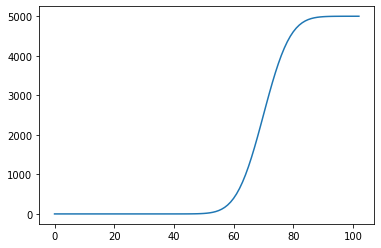

In [249]:
plt.plot(model(t_train, guesses))

In [288]:
res = least_squares(residual, x0=guesses, args=(1, ))

In [289]:
res.x

array([2.65073570e+03, 8.01765037e-02, 8.28639769e+01])

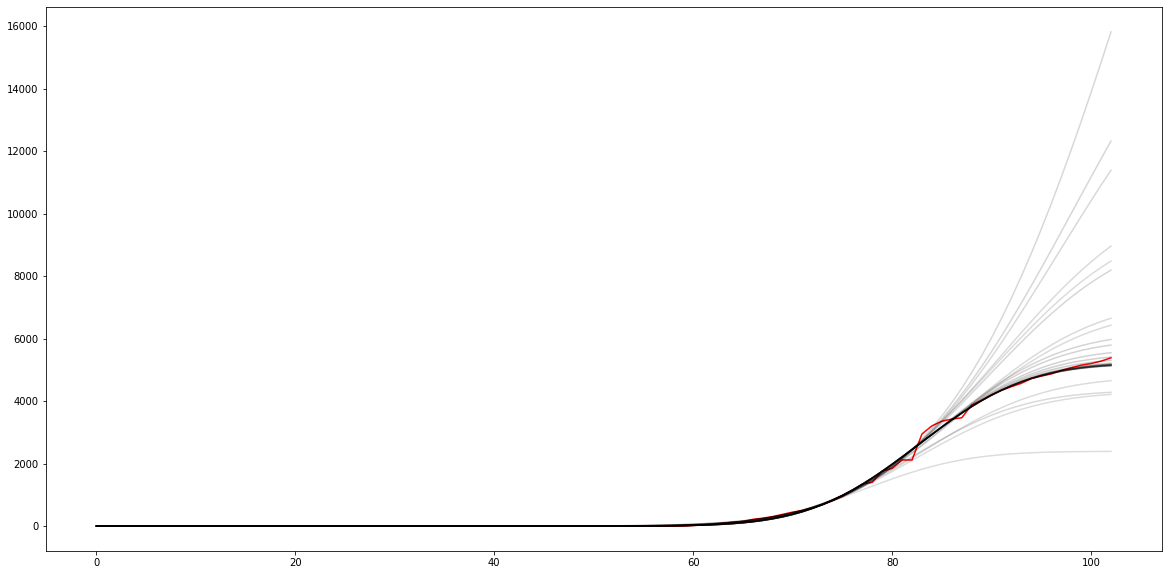

In [285]:
plt.figure(figsize=(20,10))
plt.plot(data, c='r')
for w in range(3, 28, 1):
    res = least_squares(residual, x0=guesses, args=(w, ))
    plt.plot(model(t_max, res.x), c='k', alpha=1/w+.1)
plt.show()

# Gaussian Process

In [3]:
import pymc3 as pm
import arviz as az

/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/theano/gof/op.py:1543: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  define_macros.append("#define INPUT_%d %s" (i, inp))
/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/theano/gof/op.py:1547: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  define_macros.append("#define OUTPUT_%d %s" (i, inp))
/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/theano/gof/opt.py:1287: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(tracks) is 0:
/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/theano/compile/mode.py:264: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if optimizer is 'default':
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/tzuchen/PycharmProjects/SKTW/venv/lib64/python3.8/site-packages/theano/tensor/nnet/bn.py:645: SyntaxWarning:

In [294]:
with pm.Model() as erf_model:
    
    β = pm.Normal('β', mu=2650, sigma=10)
    γ = pm.Normal('γ', mu=0.08, sigma=0.01)
    t_int = pm.Normal('t0', mu=82.8, sigma=1)
    σ = pm.HalfNormal('σ', sigma=100)
    μ = β * (1 + pm.math.erf(γ * (t_vec - t_int)))
    
    positive = pm.Normal('positive', mu=μ, sigma=σ, observed=data)


In [295]:
with erf_model:
    trace = pm.sample(1000, tune=2000, cores=8)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [σ, t0, γ, β]
Sampling 8 chains, 0 divergences: 100%|██████████| 24000/24000 [00:05<00:00, 4222.74draws/s]


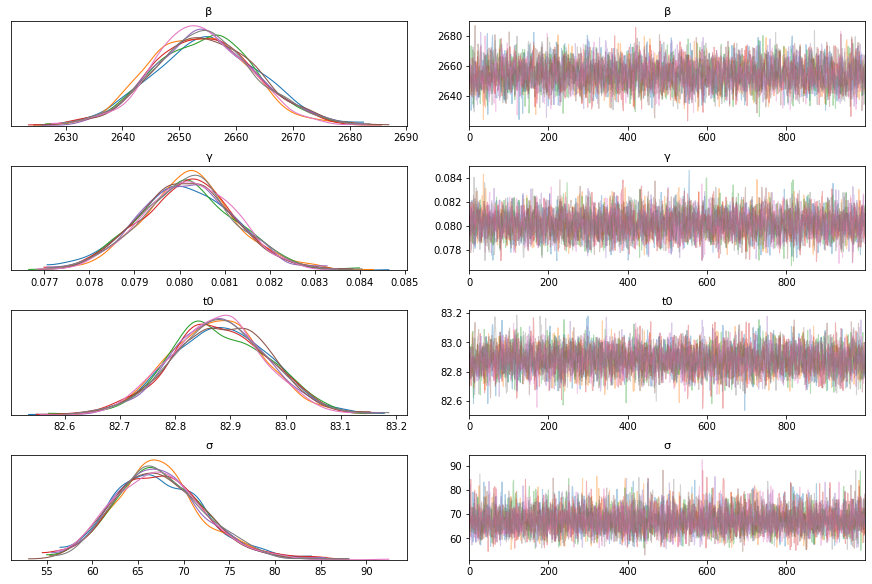

In [296]:
az.plot_trace(trace);